In [1]:
import pandas as pd
from wsi.utils import processed_data_path, raw_data_path, imgs_path

In [2]:
# # read in temp fill with conflict data
# df_conflict = pd.read_csv(raw_data_path('WSI_with_shocks_v2.csv')) ## TODO: replace this and below cells with 'womens_safety_index.csv'
# df_conflict = df_conflict[['ISO Code', 'Year', 'Conflict Population', 'Disaster Deaths', 'Disaster Affected',
#        'Conflict Population (score)', 'Disaster Deaths (score)',
#        'Disaster Affected (score)', 'Shocks']]

# # read in WSI basleine
# df_baseline = pd.read_csv(processed_data_path('womens_safety_index_baseline.csv')).rename(columns={'ISO_code':'ISO Code'})

In [3]:
# final_df = df_baseline.merge(
#     df_conflict,
#     on=['ISO Code', 'Year'],
#     how='left'
# )

In [4]:
# alpha = 0.5
# final_df['WSI'] = final_df["WSI (Baseline)"] - alpha * final_df['Shocks']
# final_df['WSI'] = final_df['WSI'].clip(lower=0)

# final_df

In [5]:
# final_df[~final_df['WSI'].isna()]

In [6]:
# final_df.to_csv(processed_data_path('WSI_with_shocks.csv'))

In [20]:
final_df = pd.read_csv(processed_data_path('womens_safety_index.csv'), index_col=0)

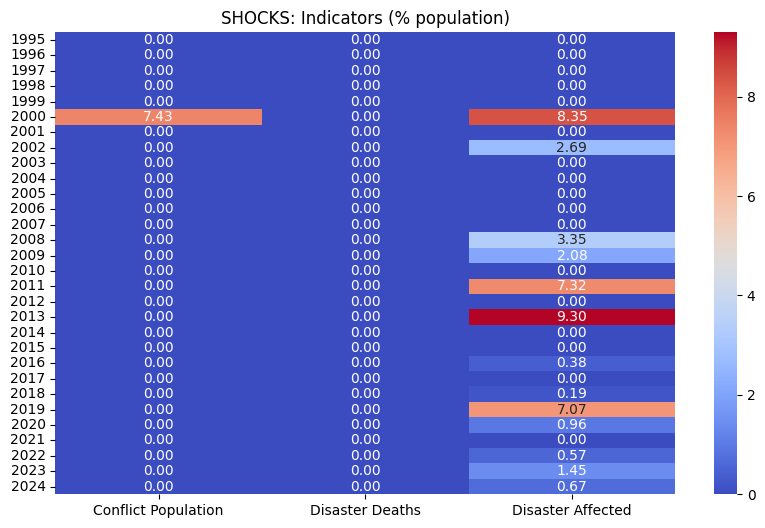

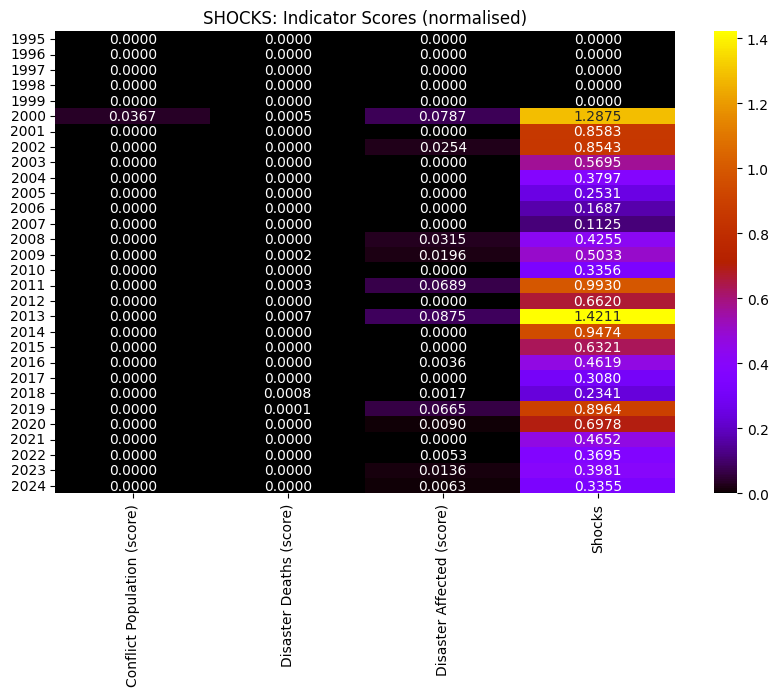

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Display heatmap for PNG data
png_data = final_df[final_df['ISO_code'] == 'LAO']


plt.figure(figsize=(10, 6))
sns.heatmap(png_data[['Conflict Population', 'Disaster Deaths', 'Disaster Affected']], 
            annot=True, cmap='coolwarm', fmt='.2f', 
            yticklabels=png_data['Year'].values)
plt.title('SHOCKS: Indicators (% population)')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(png_data[['Conflict Population (score)', 'Disaster Deaths (score)', 'Disaster Affected (score)', 'Shocks']], 
            annot=True, cmap='gnuplot', fmt='.4f', 
            yticklabels=png_data['Year'].values)
plt.title('SHOCKS: Indicator Scores (normalised)')
plt.show()


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def generate_shock_heatmap(df, iso_code, indicators, title, cmap, fmt, filename):
    """
    Generate and save a heatmap of shocks for a given ISO country code.
    """
    data = df[df['ISO_code'] == iso_code]

    if data[indicators].isna().all().all():
        print(f"No data found for ISO code '{iso_code}'. Skipping heatmap.")
        return

    # Get country name
    country_name = data['Economy'].iloc[0].replace(" ", "_")

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        data[indicators],
        annot=True,
        cmap=cmap,
        fmt=fmt,
        yticklabels=data['Year'].values
    )
    plt.title(f"{country_name} {title}")
    plt.tight_layout()

    # Save with country name prefix
    full_filename = f"{country_name}_{filename}"
    output_path = imgs_path("shock_heatmaps", full_filename)
    plt.savefig(output_path)
    plt.close()
    print(f"Saved heatmap for {country_name} to: {output_path}")


In [26]:
final_df

,ISO_code,Year,Education,Employment,Parliamentary Representation,Poverty,Legal Protection Index,Son Bias,Maternal Mortality,Attitudes Towards Violence,...,included_index,Economy,Conflict Population,Disaster Deaths,Disaster Affected,Conflict Population (score),Disaster Deaths (score),Disaster Affected (score),Shocks,WSI
0,AFG,1995,0.217986,48.240352,25.925926,4.226653,0.197917,105.8,1346.14410,7.485015,...,True,Afghanistan,109.926523,0.000000,0.000000,0.543378,0.000000,0.000000,18.112617,13.256299
1,AFG,1996,0.217986,48.240352,25.925926,4.226653,0.197917,106.0,1346.14410,7.485015,...,True,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,1997,0.217986,48.240352,25.925926,4.226653,0.197917,106.2,1346.14410,7.485015,...,True,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,1998,0.217986,48.240352,25.925926,4.226653,0.197917,106.4,1346.14410,7.485015,...,True,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,1999,0.217986,48.240352,25.925926,4.226653,0.197917,106.5,1346.14410,7.485015,...,True,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,ZWE,2020,0.852830,66.377519,34.571429,39.800000,0.875000,102.4,356.75892,8.828383,...,True,Zimbabwe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.177752,53.798839
5696,ZWE,2021,0.852830,64.499665,34.571429,39.800000,0.875000,102.4,356.75892,8.828383,...,True,Zimbabwe,0.000000,0.000019,0.015326,0.000000,0.000008,0.000144,0.120198,53.372432
5697,ZWE,2022,0.852830,63.862897,33.625731,39.800000,0.875000,102.4,356.75892,8.828383,...,True,Zimbabwe,0.000000,0.004707,0.041111,0.000000,0.002065,0.000387,0.107380,53.365843
5698,ZWE,2023,0.852830,65.737269,33.625731,39.800000,0.875000,102.5,356.75892,8.828383,...,True,Zimbabwe,0.000000,0.000012,0.000000,0.000000,0.000005,0.000000,0.071647,53.471694


In [27]:
for iso in final_df['ISO_code'].unique():
    # Raw indicators heatmap
    generate_shock_heatmap(
        final_df,
        iso_code=iso,
        indicators=['Conflict Population', 'Disaster Deaths', 'Disaster Affected'],
        title='SHOCKS: Indicators (% population)',
        cmap='coolwarm',
        fmt='.2f',
        filename='shock_pct_population.png'
    )

    # Normalised score heatmap
    generate_shock_heatmap(
        final_df,
        iso_code=iso,
        indicators=['Conflict Population (score)', 'Disaster Deaths (score)', 'Disaster Affected (score)', 'Shocks'],
        title='SHOCKS: Indicator Scores (normalised)',
        cmap='gnuplot',
        fmt='.4f',
        filename='shock_normalised.png'
    )


Saved heatmap for Afghanistan to: C:\Users\kbuc0011\Documents\WSI\imgs\shock_heatmaps\Afghanistan_shock_pct_population.png
Saved heatmap for Afghanistan to: C:\Users\kbuc0011\Documents\WSI\imgs\shock_heatmaps\Afghanistan_shock_normalised.png
Saved heatmap for Angola to: C:\Users\kbuc0011\Documents\WSI\imgs\shock_heatmaps\Angola_shock_pct_population.png
Saved heatmap for Angola to: C:\Users\kbuc0011\Documents\WSI\imgs\shock_heatmaps\Angola_shock_normalised.png
Saved heatmap for Albania to: C:\Users\kbuc0011\Documents\WSI\imgs\shock_heatmaps\Albania_shock_pct_population.png
Saved heatmap for Albania to: C:\Users\kbuc0011\Documents\WSI\imgs\shock_heatmaps\Albania_shock_normalised.png
Saved heatmap for United_Arab_Emirates to: C:\Users\kbuc0011\Documents\WSI\imgs\shock_heatmaps\United_Arab_Emirates_shock_pct_population.png
Saved heatmap for United_Arab_Emirates to: C:\Users\kbuc0011\Documents\WSI\imgs\shock_heatmaps\United_Arab_Emirates_shock_normalised.png
Saved heatmap for Argentina to: 